# **Demography of Coders in 2020**

> Indented block


In this notebook, I will try to answer how the age and country can affect people to learn about code


1.   What is the age range trend of coders?
2.   What is the most used programming language in an age range?
3.   How is the correlation between 1st age code and years code in a country based on its age range? 



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

We load Pandas, Numpy, and pyplot for this project. This libraries will be heavily used for this project

**Load and Filter Data needed**

For understanding the data, we only use the desired column to answer the question above.
The desired columns are mainly about the background of respondent.

In [3]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Load data from csv
df = pd.read_csv('/content/drive/MyDrive/Dataset Udacity/Stack Overflow 2020/survey_results_public.csv')

# Show only the desired column
column = ['MainBranch','Age1stCode','Country','Hobbyist','YearsCode']

df = df[column]

df.head()

,MainBranch,Age1stCode,Country,Hobbyist,YearsCode
0,I am a developer by profession,13,Germany,Yes,36
1,I am a developer by profession,19,United Kingdom,No,7
2,I code primarily as a hobby,15,Russian Federation,Yes,4
3,I am a developer by profession,18,Albania,Yes,7
4,"I used to be a developer by profession, but no...",16,United States,Yes,15


We won't use the unknown data

In [15]:
df = df.dropna()

In [18]:
df['Age1stCode'] = df['Age1stCode'].apply(pd.to_numeric, errors='coerce')
df['YearsCode'] = df['YearsCode'].apply(pd.to_numeric, errors='coerce')
pd.options.display.float_format = '{:,.0f}'.format

df['Age'] = df.Age1stCode + df.YearsCode
df.head()

,MainBranch,Age1stCode,Country,Hobbyist,YearsCode,Age,AgeTrend
0,I am a developer by profession,13,Germany,Yes,36,49,40s
1,I am a developer by profession,19,United Kingdom,No,7,26,20s
2,I code primarily as a hobby,15,Russian Federation,Yes,4,19,10s
3,I am a developer by profession,18,Albania,Yes,7,25,20s
4,"I used to be a developer by profession, but no...",16,United States,Yes,15,31,30s


In [58]:
df['Age'].max()

69.0

In [60]:
df['Age'].min()

6.0

We know that the maximum age of coders is 69, and the minimum is 6. From the data above we will classified the data based on its age with the range of 10 for each class.

In [20]:
class_list = [0,9.9,19.9,29.9,39.9,49.9,59.9,69.9]
class_name = ['00s','10s', '20s', '30s', '40s','50s','60s']

df['AgeTrend'] = pd.cut(df['Age'], class_list , labels = class_name)
df.head()

,MainBranch,Age1stCode,Country,Hobbyist,YearsCode,Age,AgeTrend
0,I am a developer by profession,13,Germany,Yes,36,49,40s
1,I am a developer by profession,19,United Kingdom,No,7,26,20s
2,I code primarily as a hobby,15,Russian Federation,Yes,4,19,10s
3,I am a developer by profession,18,Albania,Yes,7,25,20s
4,"I used to be a developer by profession, but no...",16,United States,Yes,15,31,30s


# **Analysis**

**Age Range Trend for Coders**

To know the age trend of coders, we simply plot the data based on the age range.



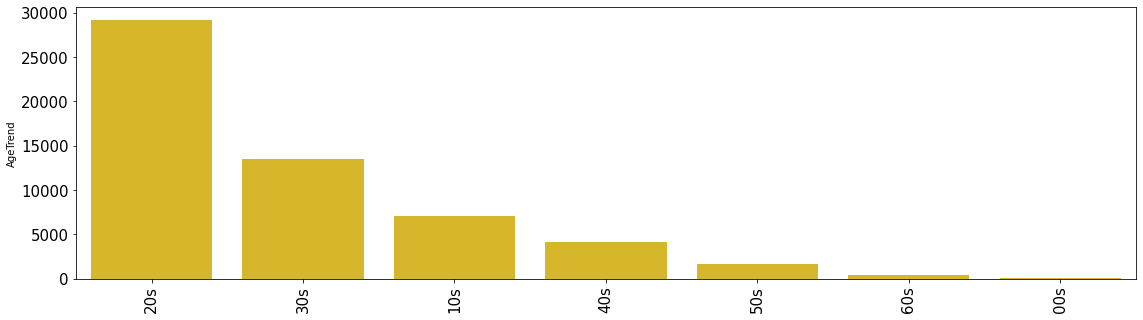

In [54]:

plt.figure(figsize=(19,5))
plt.xticks(rotation='vertical', fontsize=15.0)
plt.yticks(fontsize=15.0)
sns.barplot(x=df['AgeTrend'].value_counts().index, y=df['AgeTrend'].value_counts(), color="#F2C80F", order=df['AgeTrend'].value_counts().index)
plt.show()

As you can see, the coders are mostly in their 20s. People in 20s are born from 1990s to 2000, when technology thrived at a high pace. Followed by people in 30s then 10s. It shows that people in 10s have a high curiosity in programming language.

**Most used programming Language in an age range**